<h1 align='center' style='color:purple'>Clustering With K Means - Python Tutorial</h1>

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

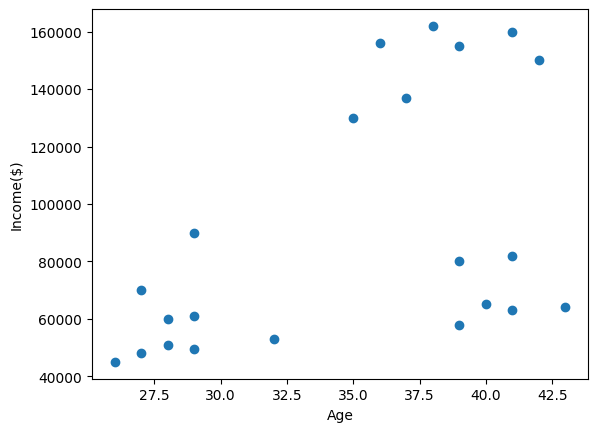

In [3]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

[![Picture2.png](https://i.postimg.cc/v81SFzhY/Picture2.png)](https://postimg.cc/5jVm88DT)

[![Picture3.png](https://i.postimg.cc/fb251t05/Picture3.png)](https://postimg.cc/sBWph2mZ)

[![Picture4.png](https://i.postimg.cc/0NQ0GkHK/Picture4.png)](https://postimg.cc/VJxtm8wz)

[![Picture5.png](https://i.postimg.cc/kXsSjrS2/Picture5.png)](https://postimg.cc/HVJjxhBm)

In [4]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [5]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [6]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

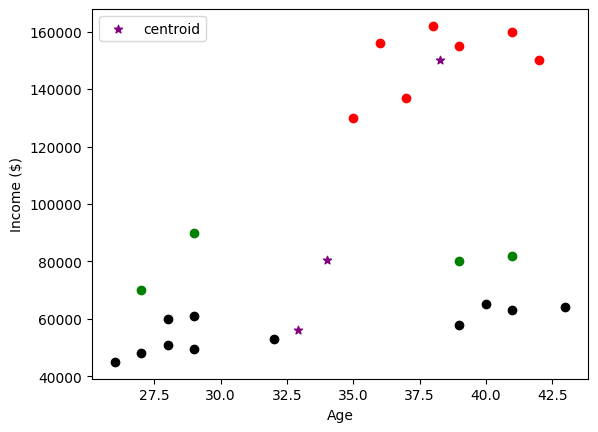

In [7]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

<h4 style='color:purple'>Preprocessing using min max scaler</h4>

In [8]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [9]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


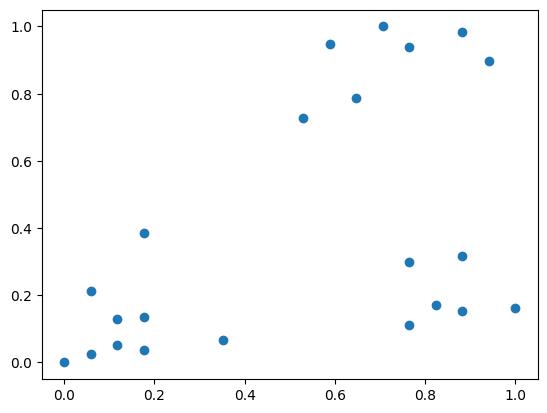

In [10]:
plt.scatter(df.Age,df['Income($)'])

In [11]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [12]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [13]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

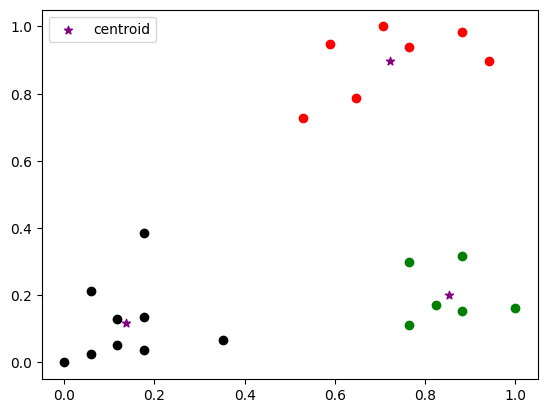

In [14]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

<h4 style='color:purple'>Elbow Plot</h4>

[![Picture1.png](https://i.postimg.cc/k5xhZXvY/Picture1.png)](https://postimg.cc/3yxB0h62)

In [15]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

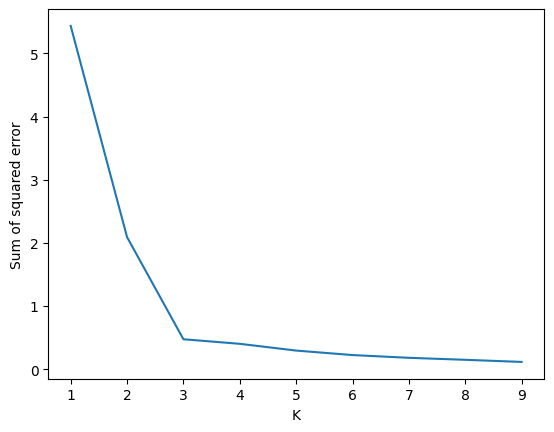

In [16]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)



---



For k = 2, Silhouette Score: 0.5305
For k = 3, Silhouette Score: 0.7130
For k = 4, Silhouette Score: 0.6136
For k = 5, Silhouette Score: 0.4663
For k = 6, Silhouette Score: 0.4579
For k = 7, Silhouette Score: 0.4494
For k = 8, Silhouette Score: 0.3155
For k = 9, Silhouette Score: 0.2898


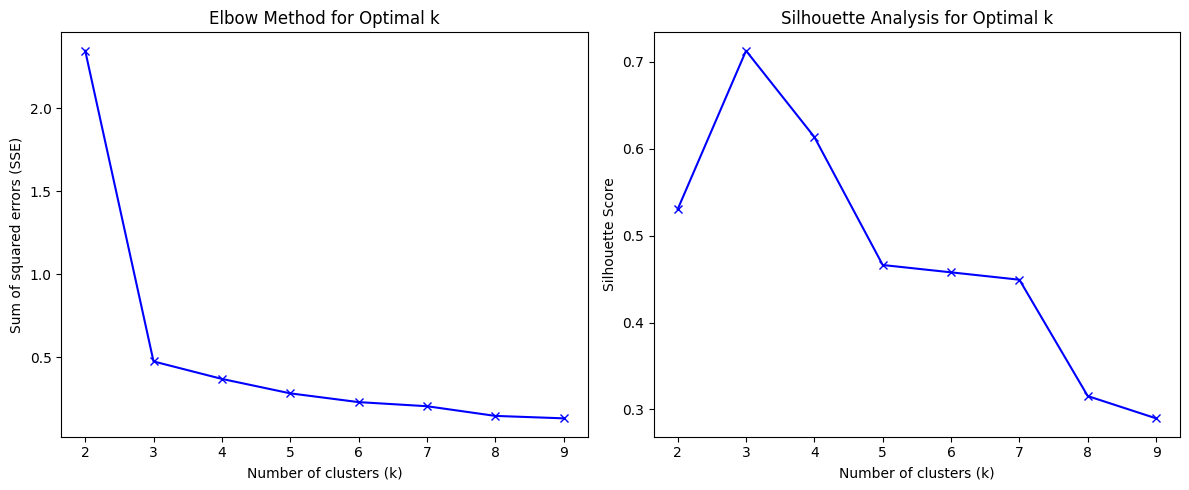


Optimal number of clusters (based on silhouette score): 3


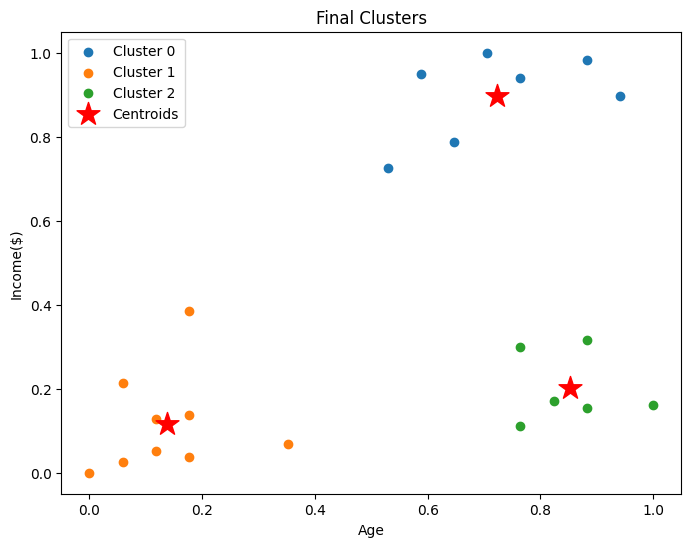

In [17]:
from sklearn.metrics import silhouette_score
import numpy as np
sse = []
silhouette_scores = []
k_rng = range(2, 10)  # Starting from 2 (silhouette requires at least 2 clusters)

# Calculate SSE and silhouette scores for different k values
for k in k_rng:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)  # Inertia = SSE

    # Silhouette score
    if k > 1:  # Silhouette score requires at least 2 clusters
        silhouette_avg = silhouette_score(df[['Age','Income($)']], km.labels_)
        silhouette_scores.append(silhouette_avg)
        print(f"For k = {k}, Silhouette Score: {silhouette_avg:.4f}")

# Plot the Elbow Method (SSE)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_rng, sse, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Method for Optimal k')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')

plt.tight_layout()
plt.show()

# Determine optimal k (highest silhouette score)
optimal_k = np.argmax(silhouette_scores) + 2  # +2 because we started from k=2
print(f"\nOptimal number of clusters (based on silhouette score): {optimal_k}")

# Fit final model with optimal k
final_km = KMeans(n_clusters=optimal_k, random_state=42)
final_km.fit(df[['Age','Income($)']])
df['Cluster'] = final_km.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(df[df['Cluster'] == i]['Age'],
                df[df['Cluster'] == i]['Income($)'],
                label=f'Cluster {i}')
plt.scatter(final_km.cluster_centers_[:, 0],
            final_km.cluster_centers_[:, 1],
            s=300, c='red', marker='*', label='Centroids')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Final Clusters')
plt.legend()
plt.show()

**k-means python code from scratch**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1️⃣ Load and preprocess dataset
# ------------------------------------------------------------
df = pd.read_csv("income.csv")
df.rename(columns={'Income': 'Income($)'}, inplace=True)
print("Original Data:")
print(df.head())

# Extract features
X = df[['Age', 'Income($)']].values

# Feature scaling (Normalization)
# Scale Age and Income to range [0,1]
X_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

print("\nScaled Data (first 5 rows):")
print(X_scaled[:5])

# ------------------------------------------------------------
# 2️⃣ Euclidean distance function
# ------------------------------------------------------------
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

Original Data:
      Name  Age  Income($)
0      Rob   27      70000
1  Michael   29      90000
2    Mohan   29      61000
3   Ismail   28      60000
4     Kory   42     150000

Scaled Data (first 5 rows):
[[0.05882353 0.21367521]
 [0.17647059 0.38461538]
 [0.17647059 0.13675214]
 [0.11764706 0.12820513]
 [0.94117647 0.8974359 ]]


In [22]:
# ------------------------------------------------------------
# 3️⃣ User-defined K-Means algorithm
# ------------------------------------------------------------
def kmeans_custom(X, k, max_iters=100):
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    for i in range(max_iters):
        clusters = [[] for _ in range(k)]
        for point in X:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)
        old_centroids = centroids.copy()
        for i, cluster in enumerate(clusters):
            if len(cluster) > 0:
                centroids[i] = np.mean(clusters[i], axis=0)
        if np.allclose(centroids, old_centroids):
            break
    labels = np.zeros(len(X))
    for idx, point in enumerate(X):
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        labels[idx] = np.argmin(distances)
    sse = 0
    for i in range(k):
        for point in X[labels == 1]:
            sse += euclidean_distance(point, centroids[i]) ** 2
    return centroids, labels, sse
    

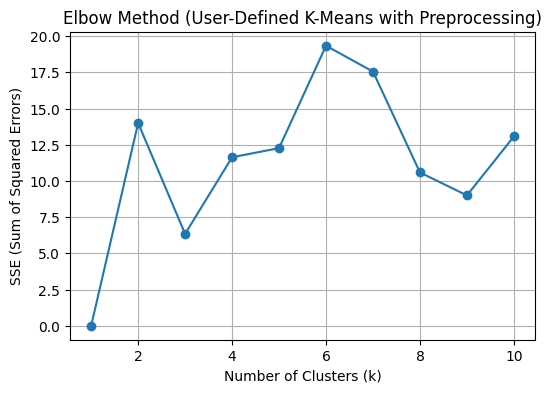

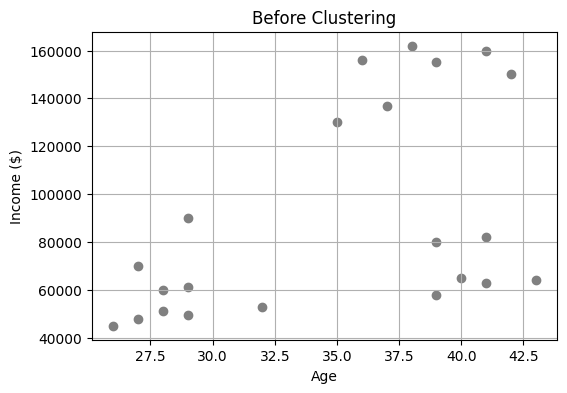

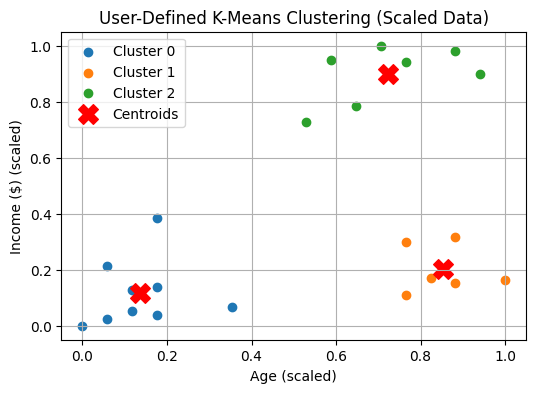

In [23]:
def elbow_method(X, max_k=10):
    sse_list = []
    for k in range(1, max_k + 1):
        _, _, sse = kmeans_custom(X, k)
        sse_list.append(sse)

    plt.figure(figsize=(6, 4))
    plt.plot(range(1, max_k + 1), sse_list, marker='o')
    plt.title("Elbow Method (User-Defined K-Means with Preprocessing)")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("SSE (Sum of Squared Errors)")
    plt.grid(True)
    plt.show()


# ------------------------------------------------------------
# 5️⃣ Find best k visually
# ------------------------------------------------------------
elbow_method(X_scaled)

# ------------------------------------------------------------
# 6️⃣ Apply K-Means (choose k, e.g., 3)
# ------------------------------------------------------------
k = 3
centroids, labels, _ = kmeans_custom(X_scaled, k)
df['Cluster'] = labels

# ------------------------------------------------------------
# 7️⃣ Plot before and after clustering
# ------------------------------------------------------------

# Before clustering (original data)
plt.figure(figsize=(6, 4))
plt.scatter(df['Age'], df['Income($)'], c='gray')
plt.title("Before Clustering")
plt.xlabel("Age")
plt.ylabel("Income ($)")
plt.grid(True)
plt.show()

# After clustering (scaled data visualization)
plt.figure(figsize=(6, 4))
for i in range(k):
    cluster_points = X_scaled[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i}")
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title("User-Defined K-Means Clustering (Scaled Data)")
plt.xlabel("Age (scaled)")
plt.ylabel("Income ($) (scaled)")
plt.legend()
plt.grid(True)
plt.show()


<h4 style='color:purple'>Exercise</h4>

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k